# Deep Learning
## Practical Deep Learning Tutorial with PyTorch - Tutorial N° 2

### 2020-2021

# Importing necessary libraries

In [1]:
import torch
import torch.nn as nn
import numpy as np
from matplotlib import pyplot as plt
from matplotlib.pyplot import plot, title, axis

# Useful Functions

You will need these 3 functions for this tutorial :

set_default to customize figure Layouts.

show_scatterplot draws a point cloud  𝑋  in 2-D, each data point has a specific color.

plot_bases shows an arrow along the x-axis in red and an arrow along the y-axis in green.

In [2]:
def set_default(figsize=(10, 10), dpi=100):
    plt.style.use(['dark_background', 'bmh'])
    plt.rc('axes', facecolor='k')
    plt.rc('figure', facecolor='k')
    plt.rc('figure', figsize=figsize, dpi=dpi)

def show_scatterplot(X, title=''):
    plt.figure()
    x_min=-1.5
    x_max=1.5
    colors = (X-x_min)/(x_max-x_min)
    colors = (colors * 511).short().numpy()
    colors = np.clip(colors, 0, 511)
    colors= colors[:, 0]
    plt.scatter(X[:, 0], X[:, 1], c=colors, s=30)
    plt.title(title)
    plt.axis('off')
    
def plot_bases(bases, width=0.04):
    plt.arrow(*bases[0], *bases[2], width=width, color=(1,0,0), zorder=10, alpha=1., length_includes_head=True)
    plt.arrow(*bases[1], *bases[3], width=width, color=(0,1,0), zorder=10, alpha=1., length_includes_head=True)

In [3]:
set_default()

PyTorch can run on both the CPU and GPU of a computer. 

The CPU is useful for sequential tasks, while the GPU is useful for parallel tasks.

You have to make sure your tensors and models are transferred to the device’s memory. This can be done with the following line of code:

In [4]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")

This line creates a variable, called device, that is assigned to the GPU if one is available; otherwise, it defaults to the CPU.

# Data Generation

1. Create a tensor $X$ of 1000 instances in 2-D and sent it to the device’s memory.

In [5]:
X = torch.randn(1000, 2).to(device)

# Visualizing linear transformations

2. Visualise the original point cloud $X$ using the two functions above.

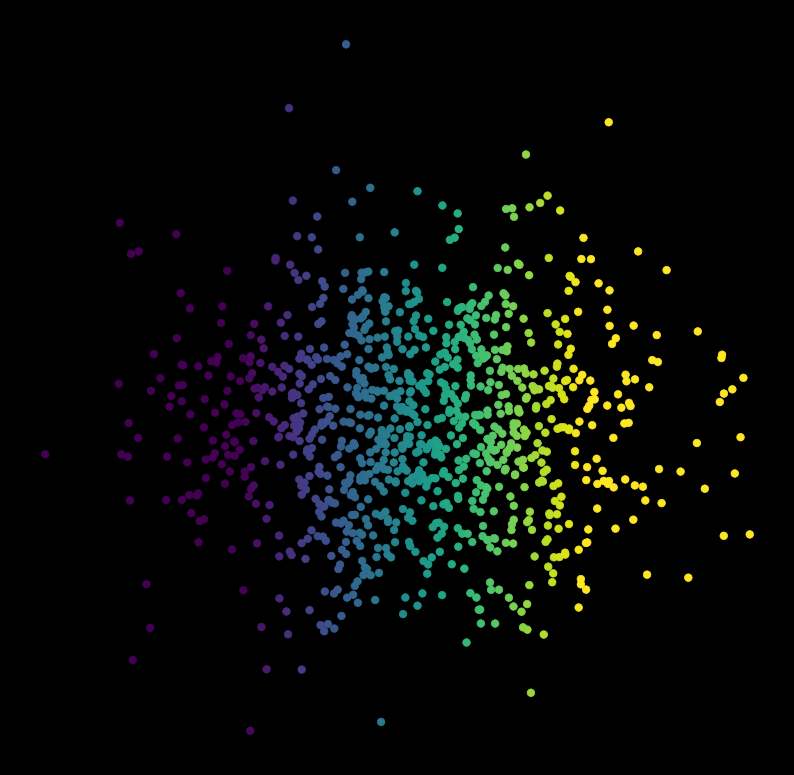

In [6]:
show_scatterplot(X)

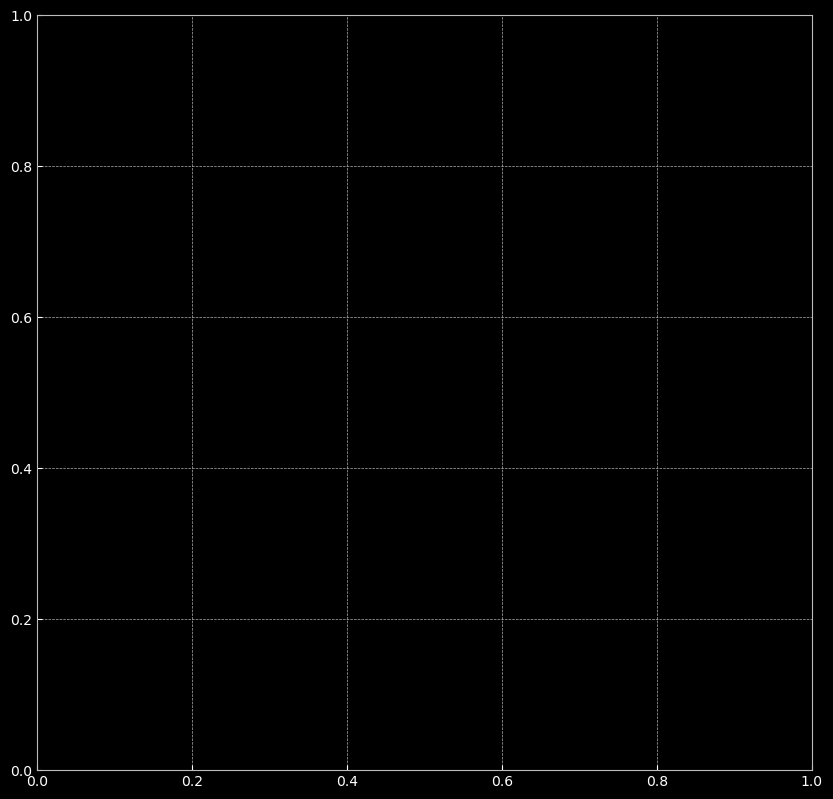

In [7]:
plot_bases(X)

3. Explain briefly the Singular value decomposition (SVD)

In linear algebra, the Singular Value Decomposition (SVD) of a matrix is a factorization of that matrix into three matrices. It has some interesting algebraic properties and conveys important geometrical and theoretical insights about linear transformations. It also has some important applications in data science.

4. Explain the relation between rotation and orthogonal matrices

Rotation (when the matrix is orthonormal).
An n*n real matrix P is orthogonal if its rows are an orthonormal set of vectors.
A rotation matrix is an orthogonal matrix of determinant +1  rather than -1(Note the identity matrix is considered a rotation matrix)

5. Explain the relation between scaling and diagonal matrices

Scaling (when the matrix is diagonal)
Scalar matrix:
A diagonal matrix with all its main diagonal entries equal is a scalar matrix, that is, a scalar multiple λI of the identity matrix I. Its effect on a vector is scalar multiplication by λ.
Diagonal matrix:
An identity matrix of any size, or any multiple of it (a scalar matrix), is a diagonal matrix. A diagonal matrix is sometimes called a scaling matrix, since matrix multiplication with it results in changing scale (size). Its determinant is the product of its diagonal values.

6. Compute 10 linear transformations suing several random matrices $W$ of size (2,2).

    For each transformation, compute the SVD of W, and visualize the transformed point cloud $Y$ with its corresponding singular values $(s_1,s_2)$.


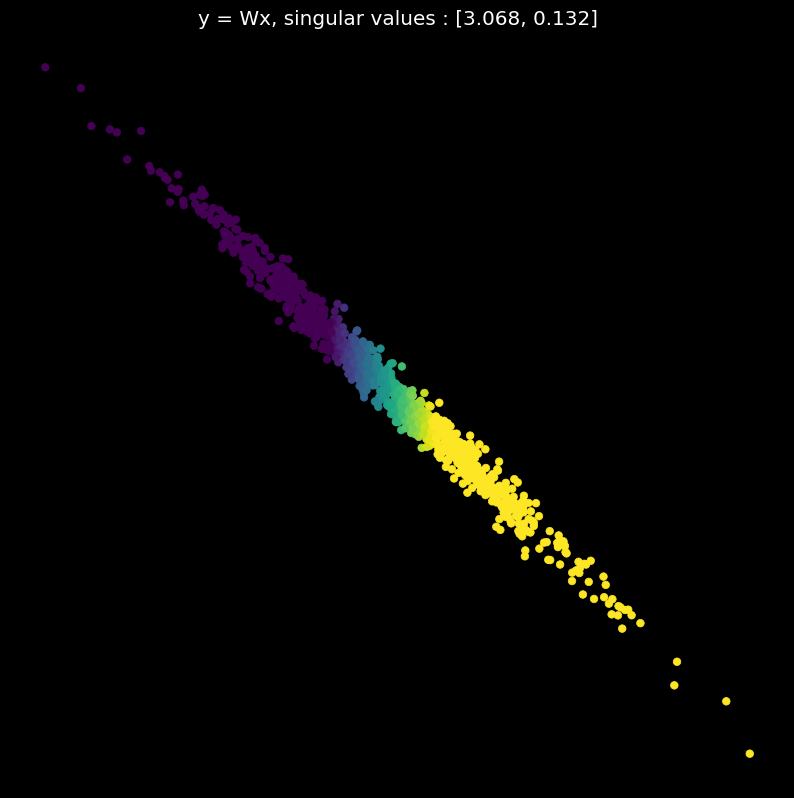

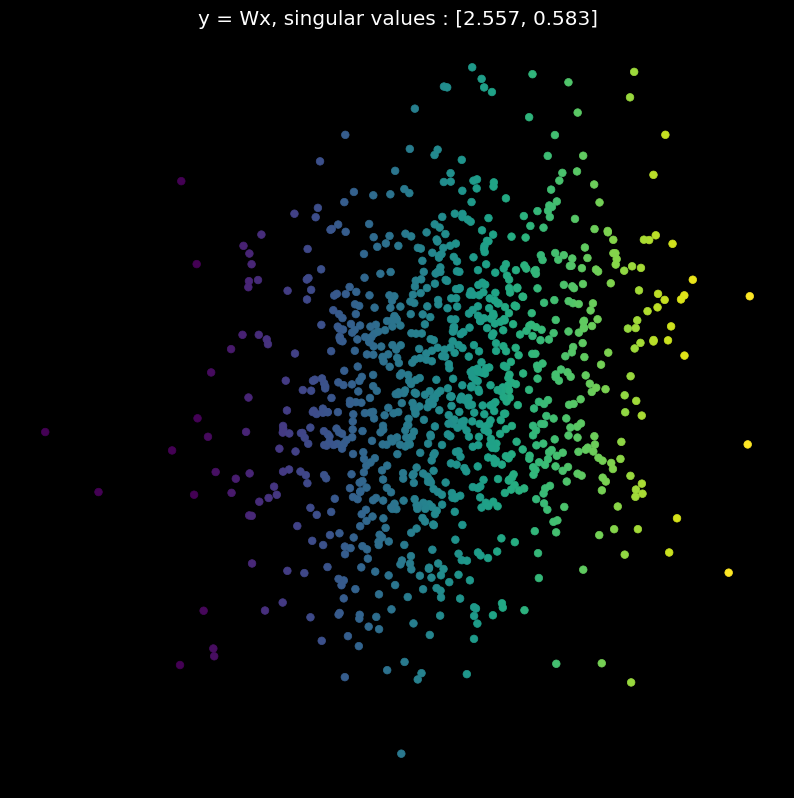

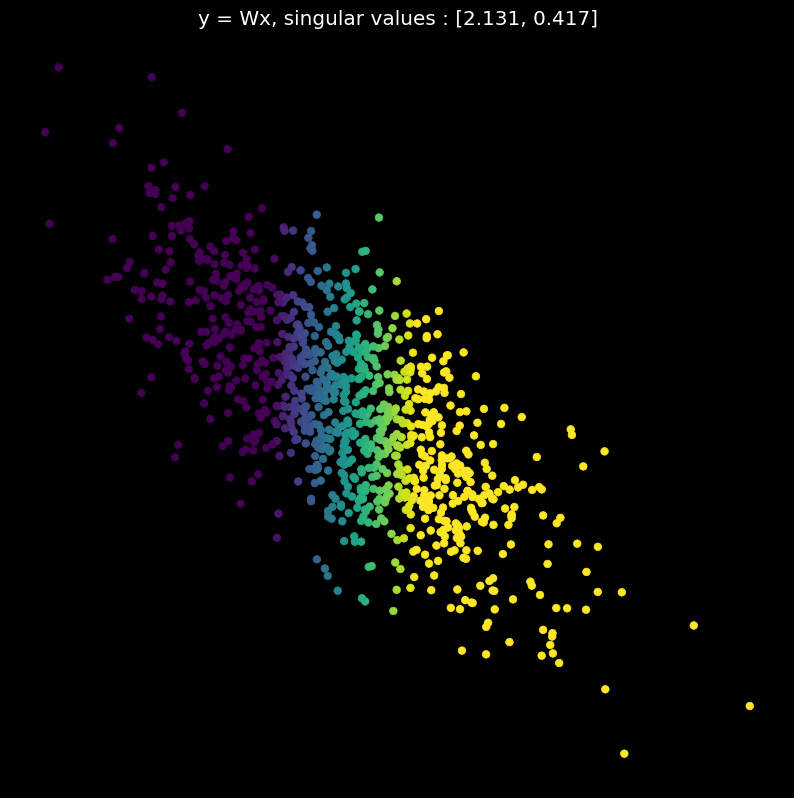

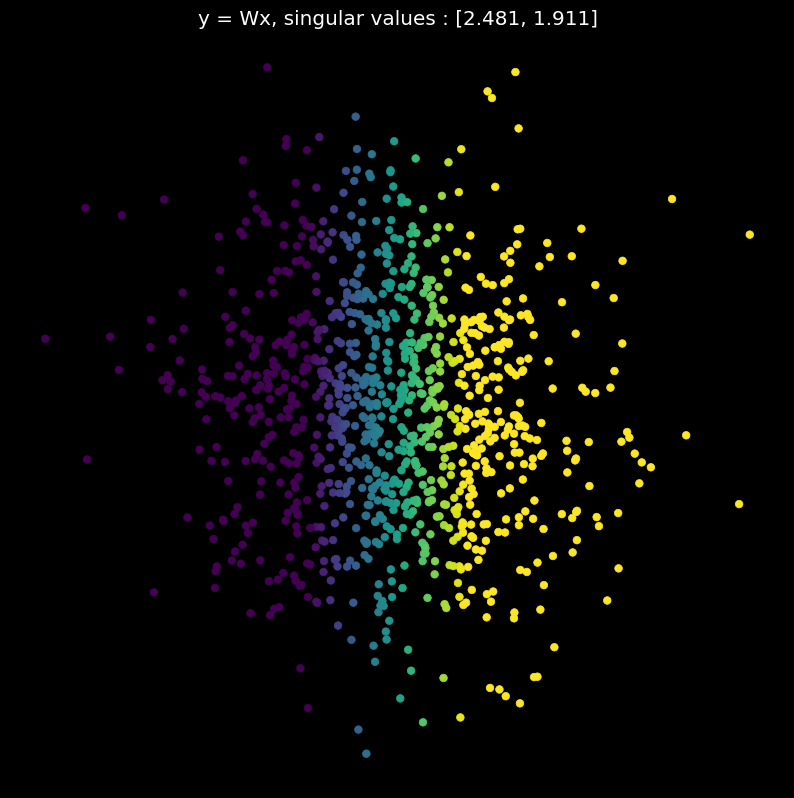

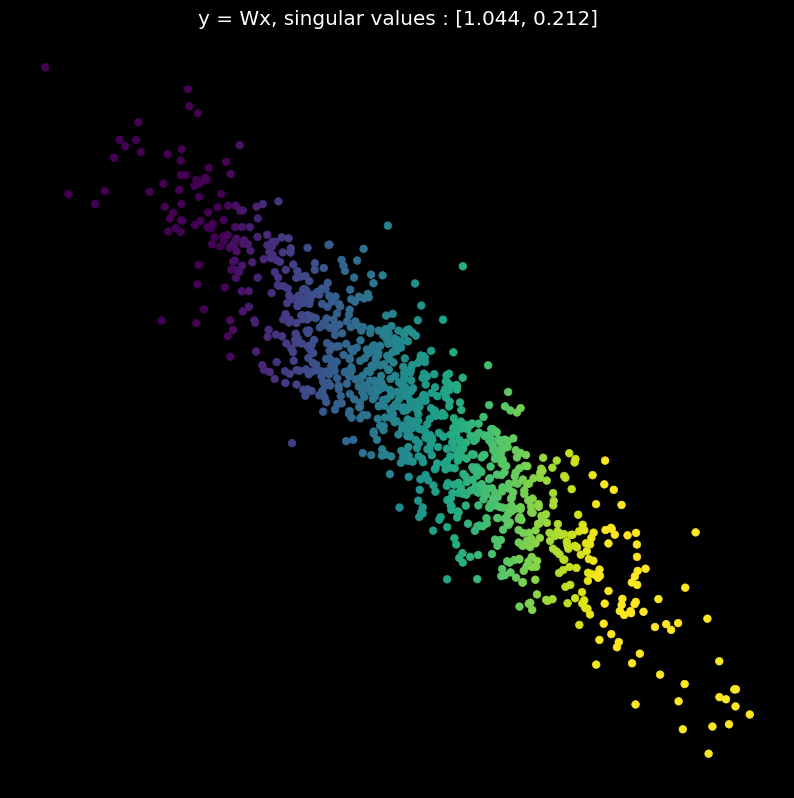

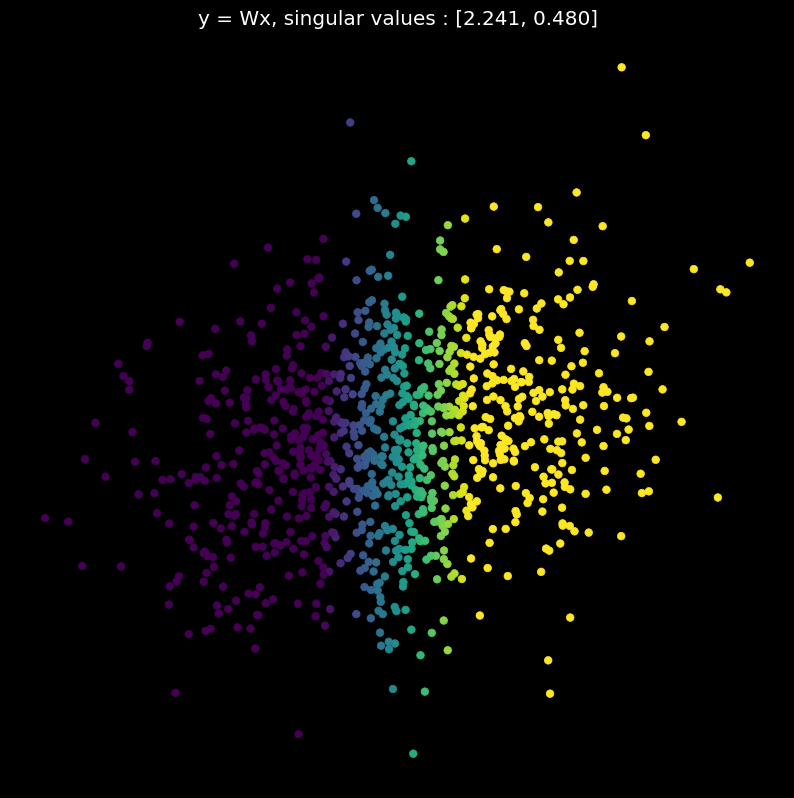

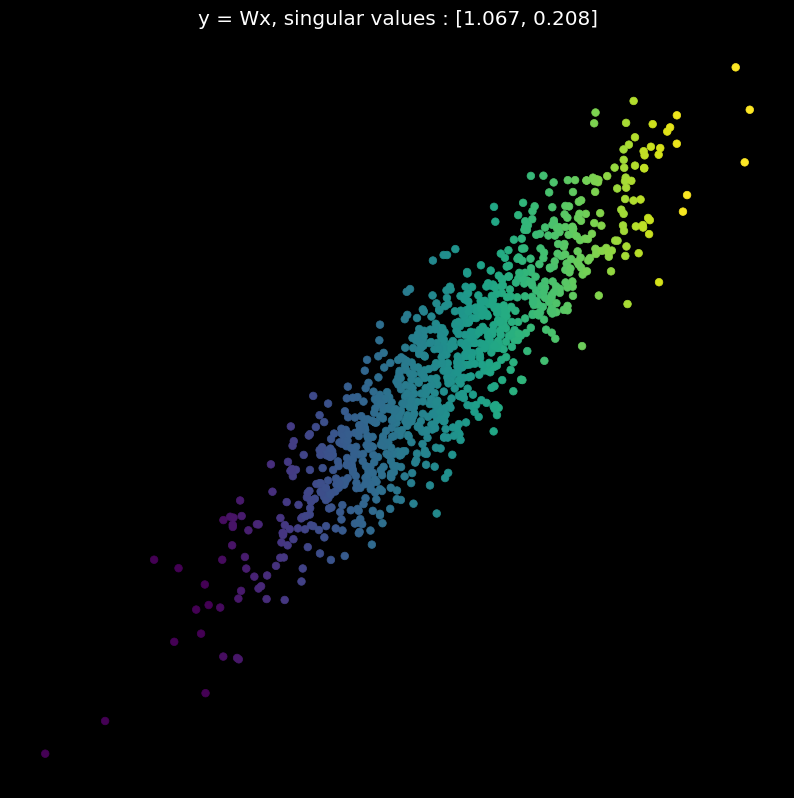

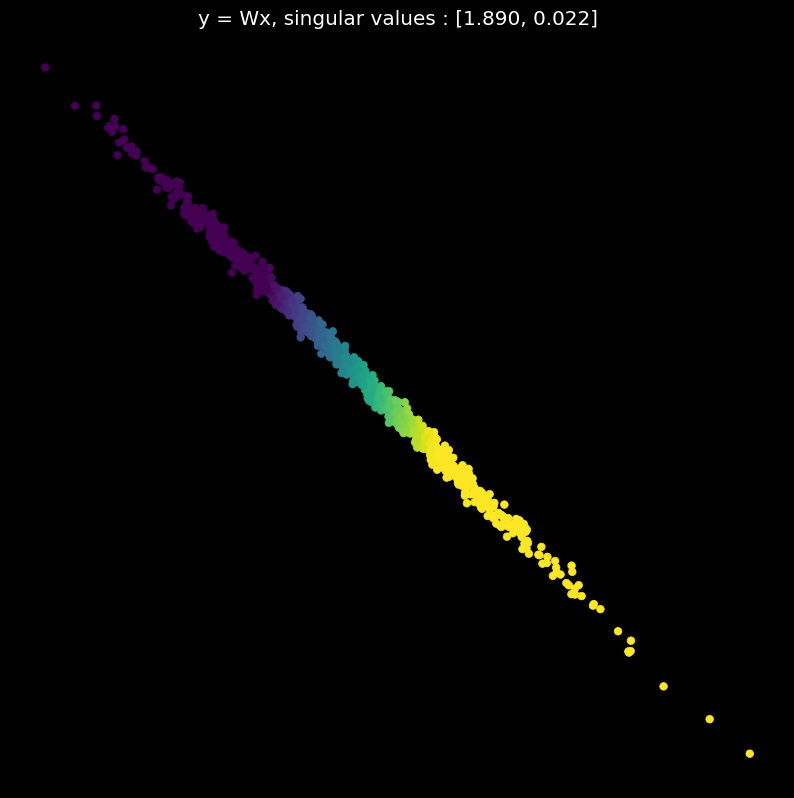

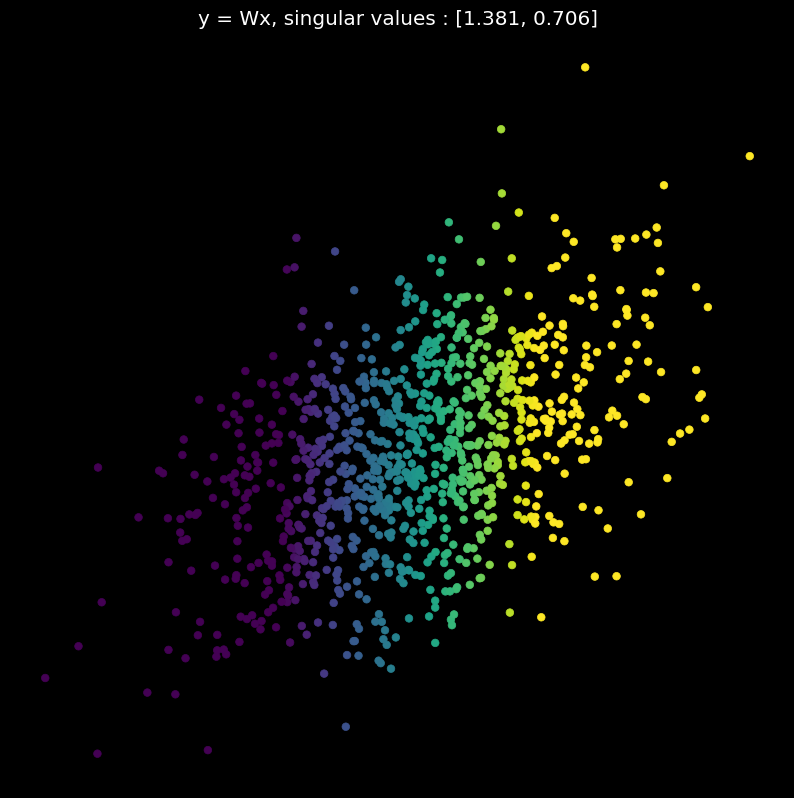

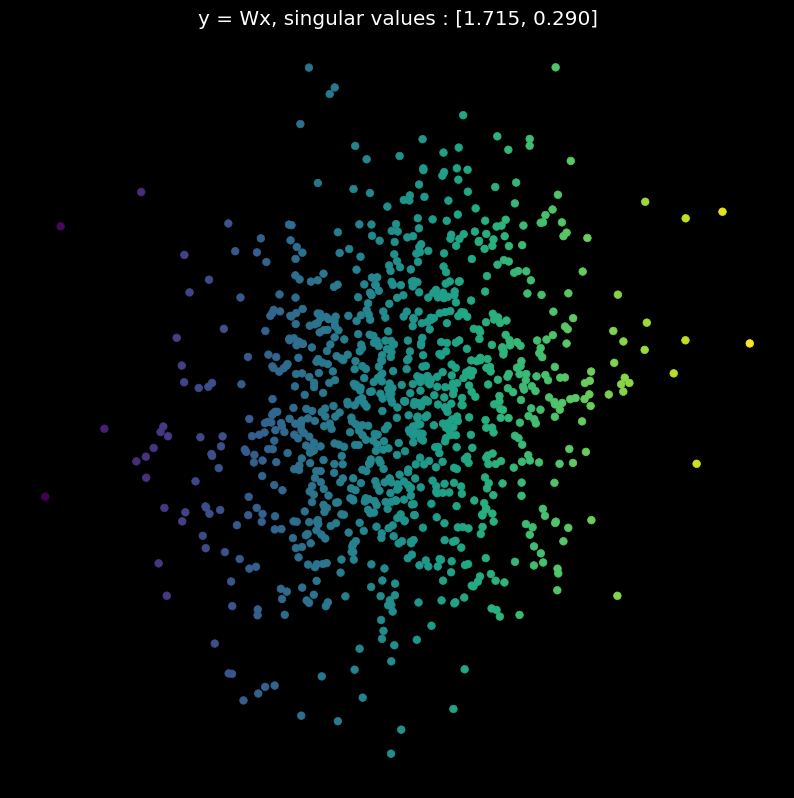

In [10]:
for i in range(10):
    # create a random matrix
    W = torch.randn(2, 2).to(device)
    # transform points
    Y = X @ W.t()
    # compute singular values
    U, S, V = torch.svd(W)
    # plot transformed points
    show_scatterplot(Y, title='y = Wx, singular values : [{:.3f}, {:.3f}]'.format(S[0], S[1]))

7. Analyse the results.

# Linear transformation with PyTorch’s nn.Linear class.

8. Compute a similar linear transformation with PyTorch’s nn.Linear class and visualize the transfomed point cloud $Y$.

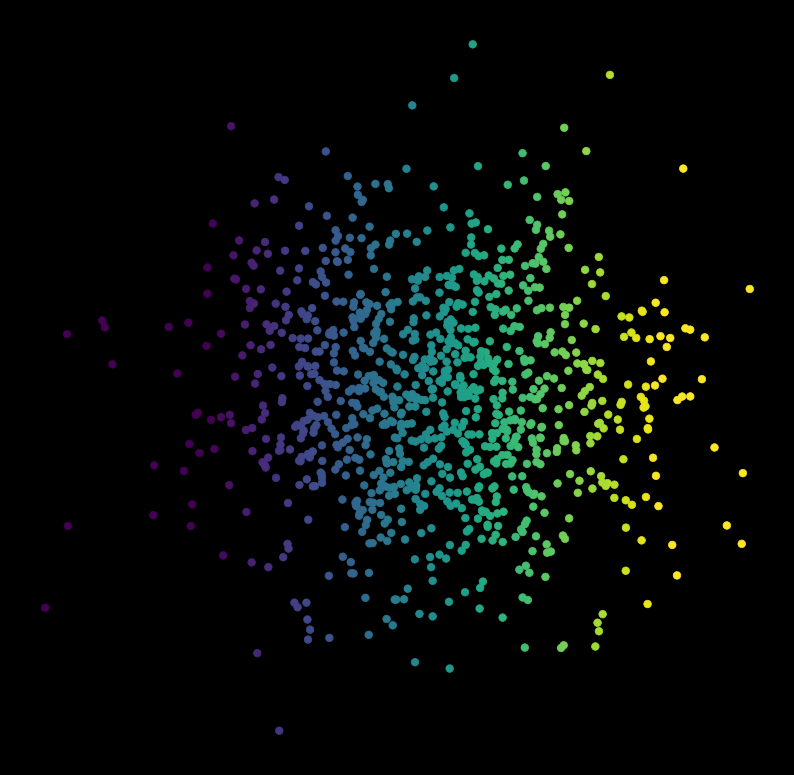

In [11]:
model = nn.Sequential(
        nn.Linear(2, 2, bias=False)
)
model.to(device)
with torch.no_grad():
    Y = model(X)
    show_scatterplot(Y)

# Non-linear transformations

9. Plot the graph of the hyperbolic tangent function (tanh). What do you notice about it ?

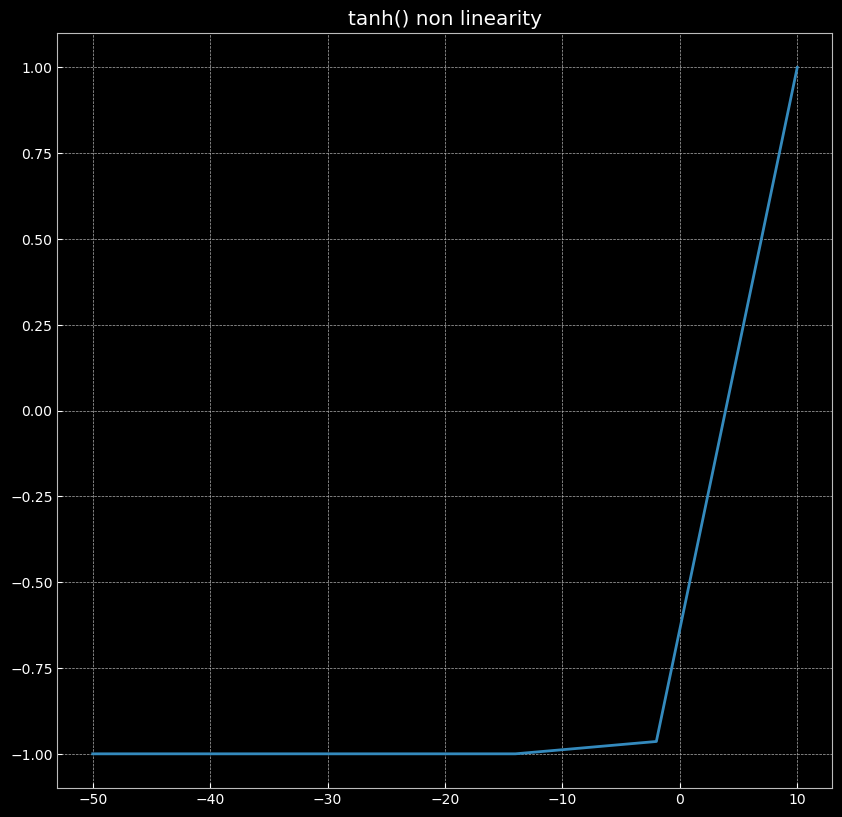

In [12]:
a = torch.linspace(-50, 10, 6)
b = torch.tanh(a)
plot(a.numpy(), b.numpy())
title('tanh() non linearity');

10. For s=1,...,5. 
    Compute a linear transformation with PyTorch’s nn.Linear class (the transformation matrix must be a $2*2$ diagonal matrix, with diagonal elements all equal to s), followed by a non-linear transformation using tanh. Visualise the results.

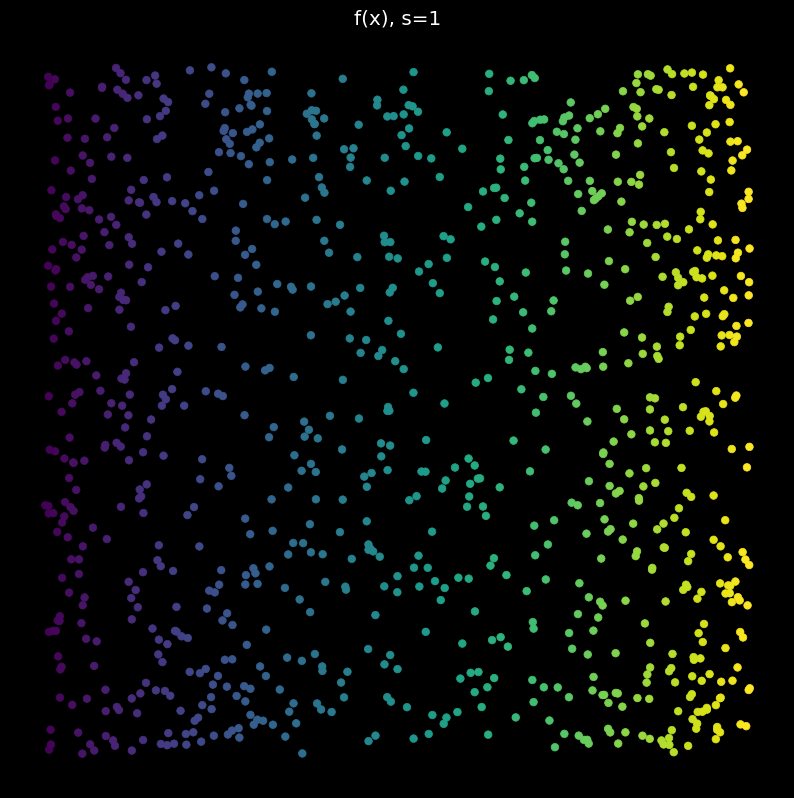

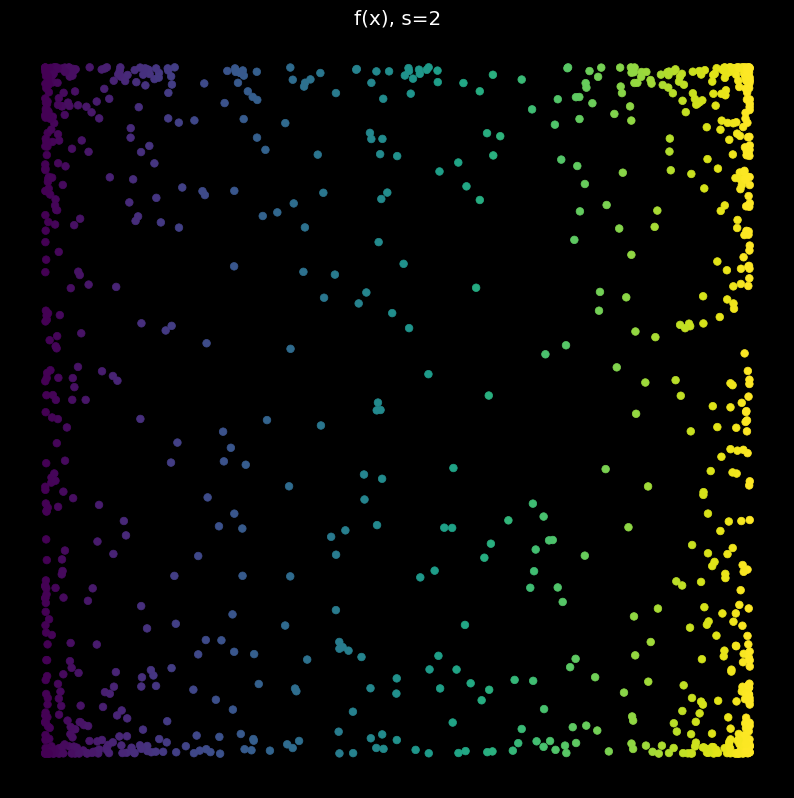

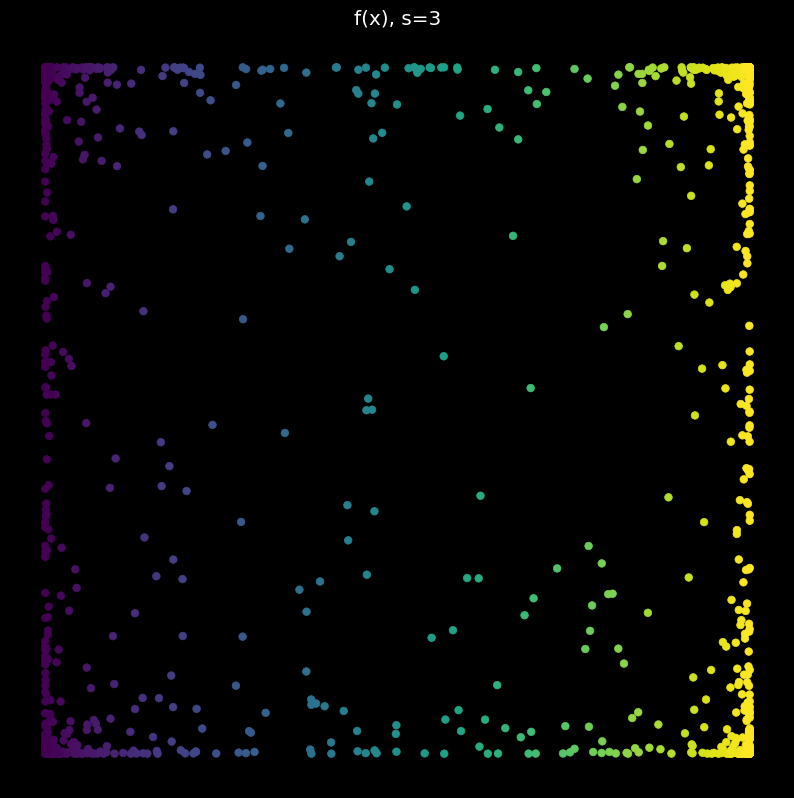

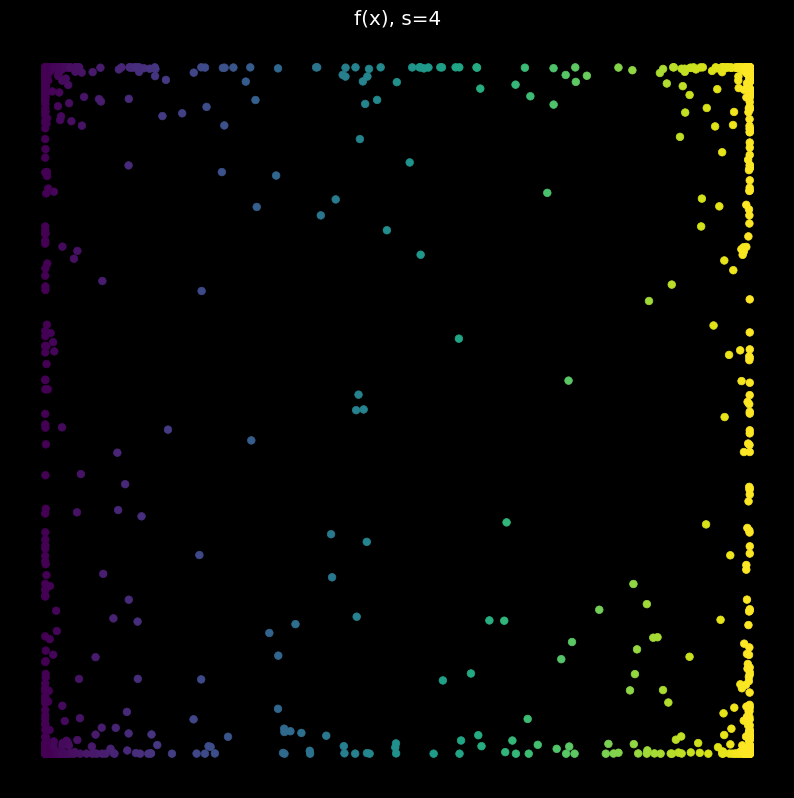

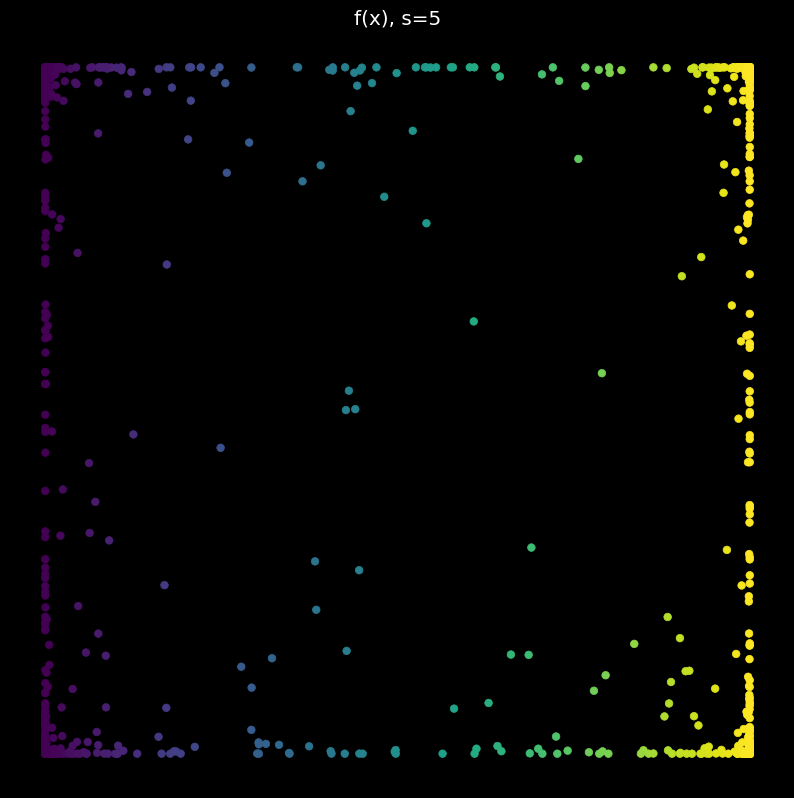

In [14]:
model = nn.Sequential(
        nn.Linear(2, 2, bias=False),
        nn.Tanh()
)

model.to(device)

for s in range(1, 6):
    W = s * torch.eye(2)
    model[0].weight.data.copy_(W)
    Y = model(X).data
    show_scatterplot(Y, title=f'f(x), s={s}')

11. Analyse the results
    

# Transformations performed by a random neural net

12. Compute the Network transformation consisting of a linear layer, which performs an affine transformation, followed by a
hyperbolic tangent non-linearity, and finally another linear layer

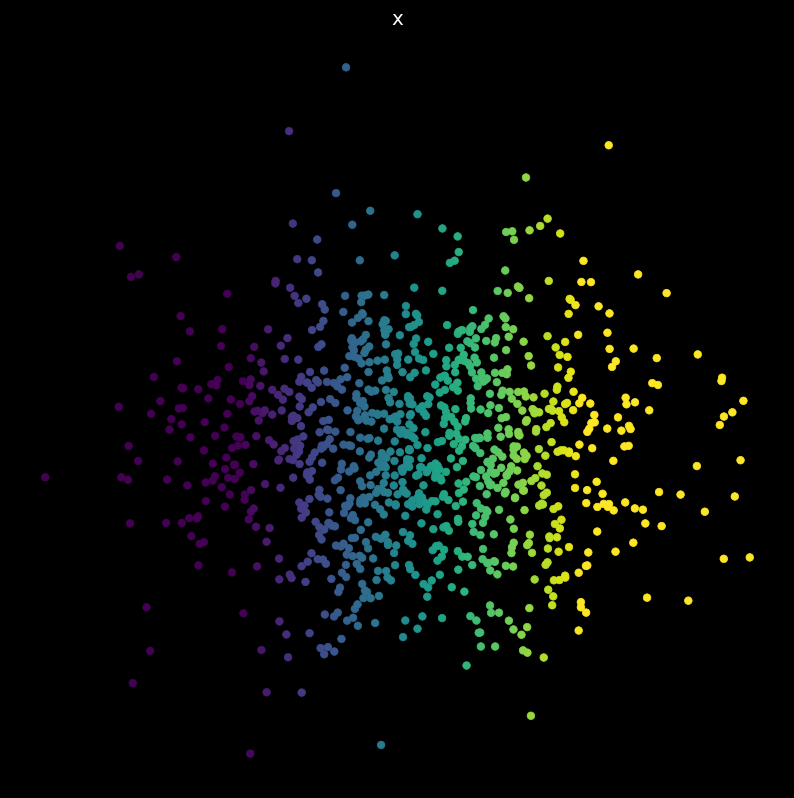

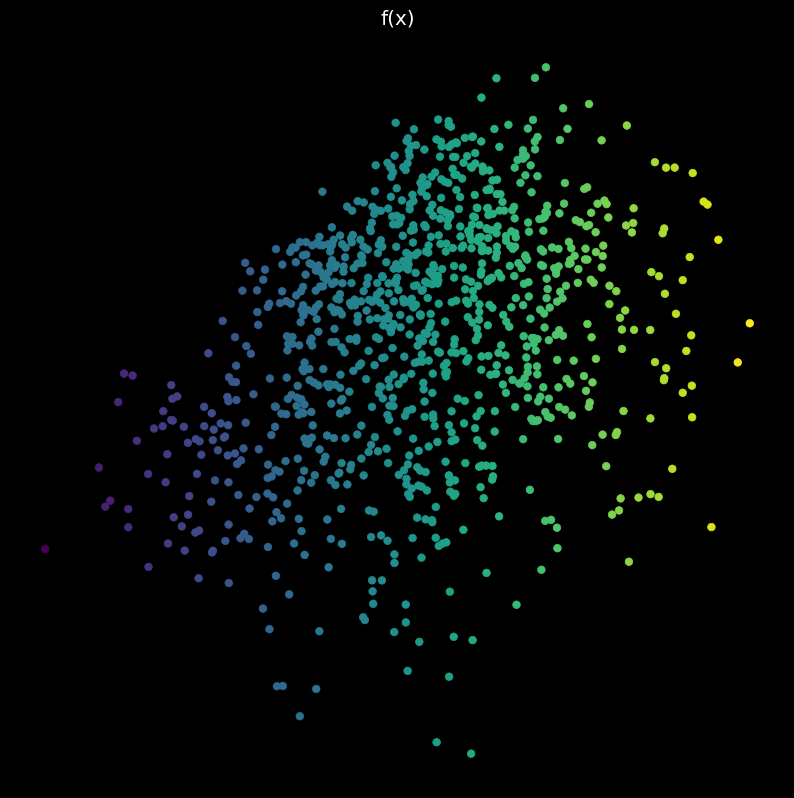

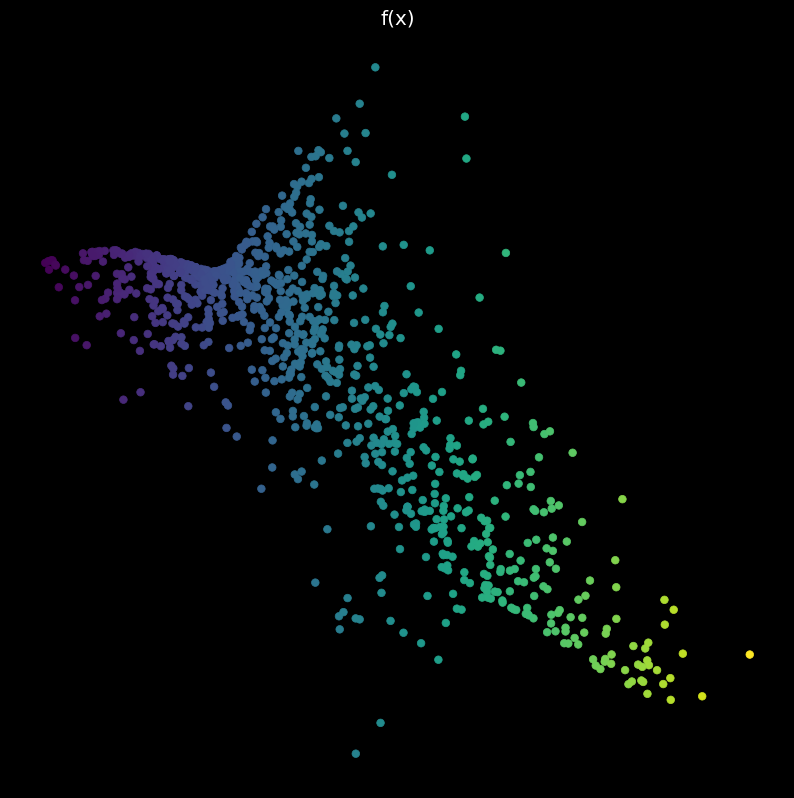

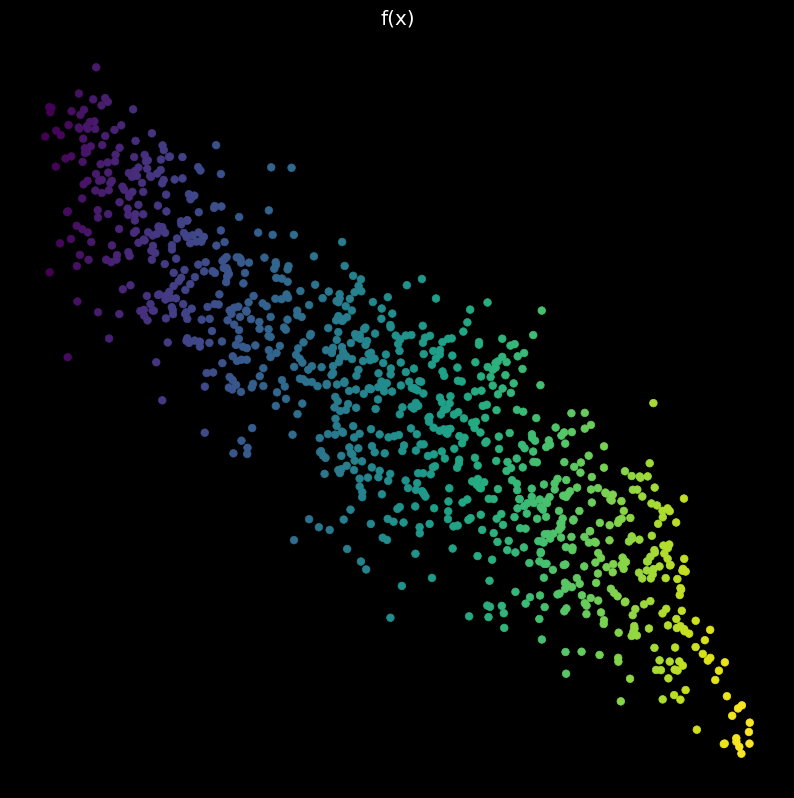

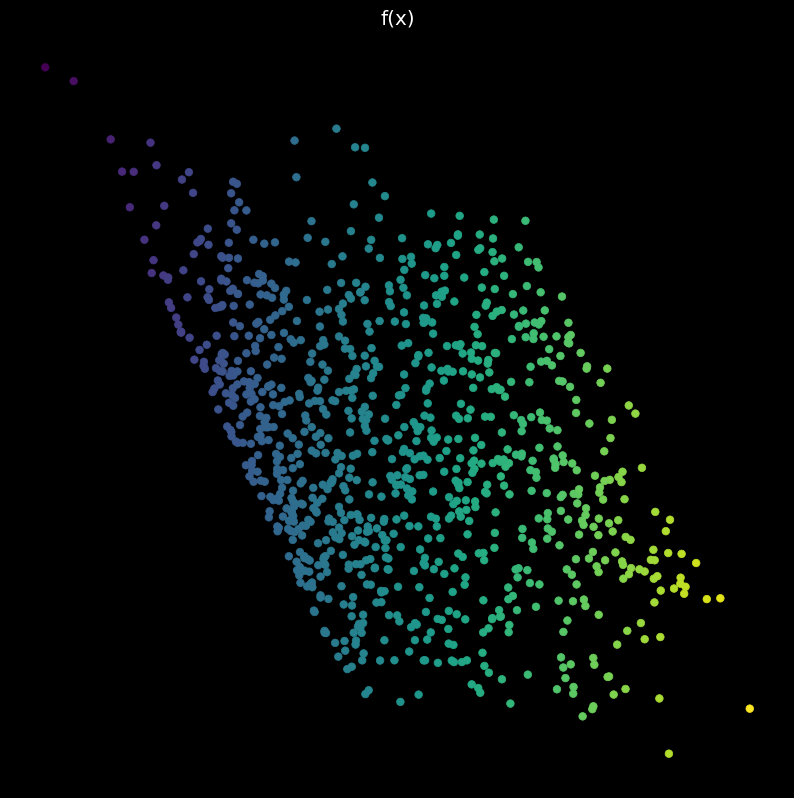

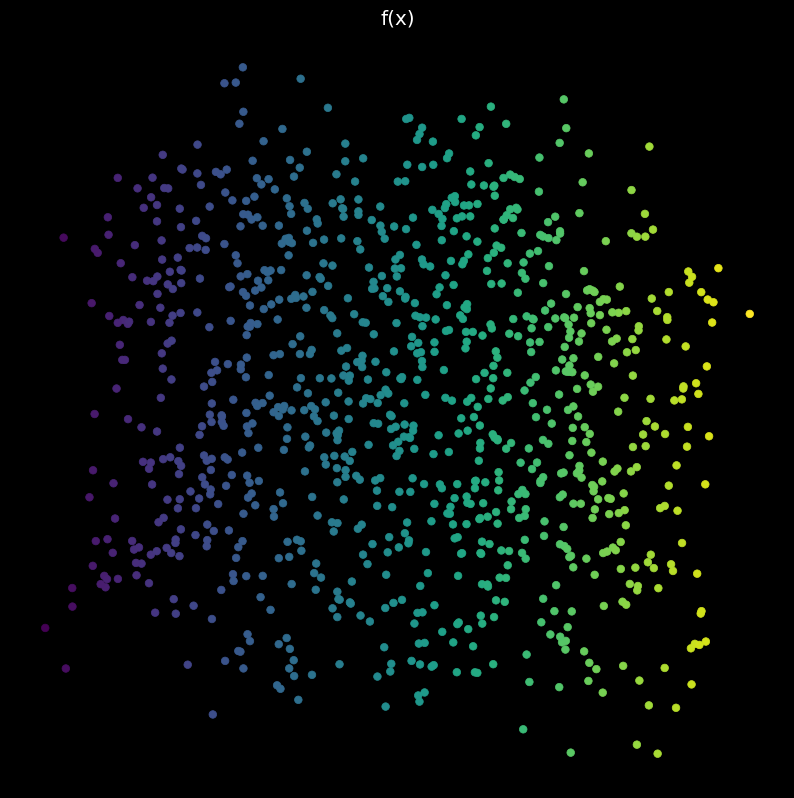

In [17]:
show_scatterplot(X, title='x')
n_hidden = 5

# NL = nn.ReLU()
NL = nn.Tanh()

for i in range(5):
    # create 1-layer neural networks with random weights
    model = nn.Sequential(
            nn.Linear(2, n_hidden), 
            NL, 
            nn.Linear(n_hidden, 2)
        )
    model.to(device)
    with torch.no_grad():
        Y = model(X)
    show_scatterplot(Y, title='f(x)')

13. Answer to the above question using a deeper neural network

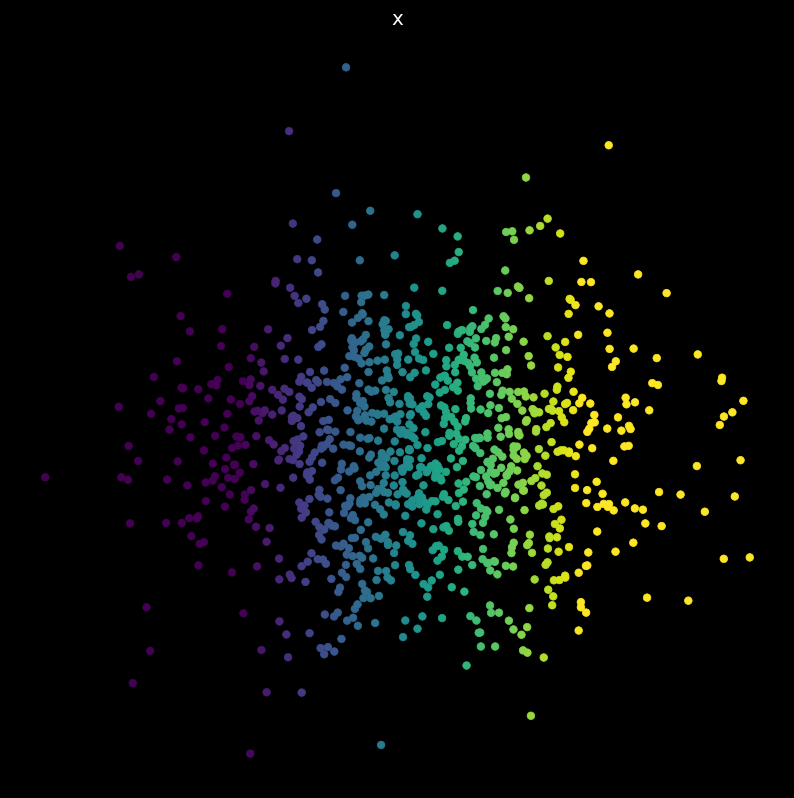

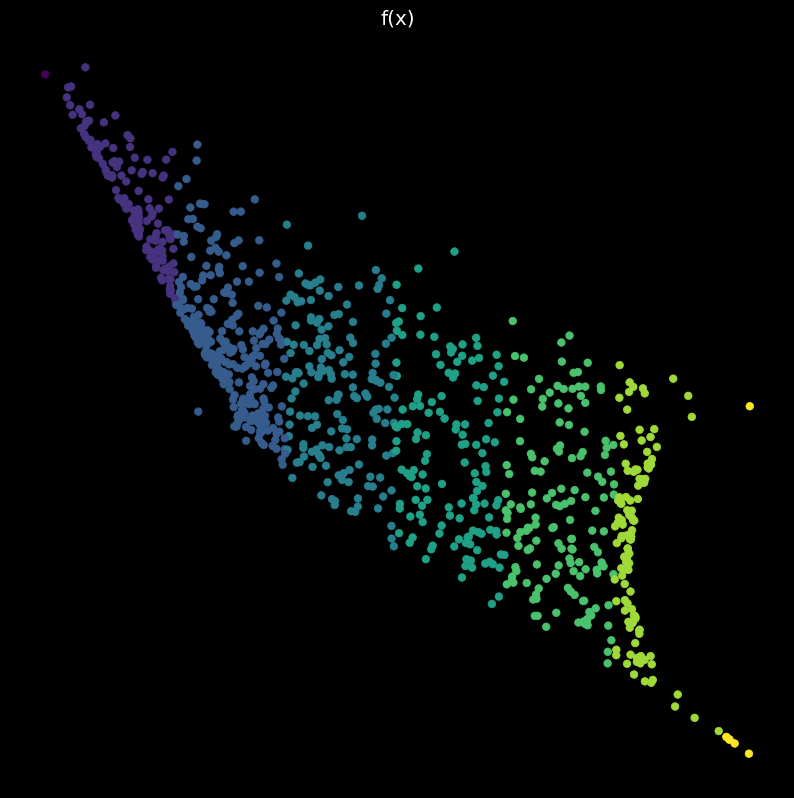

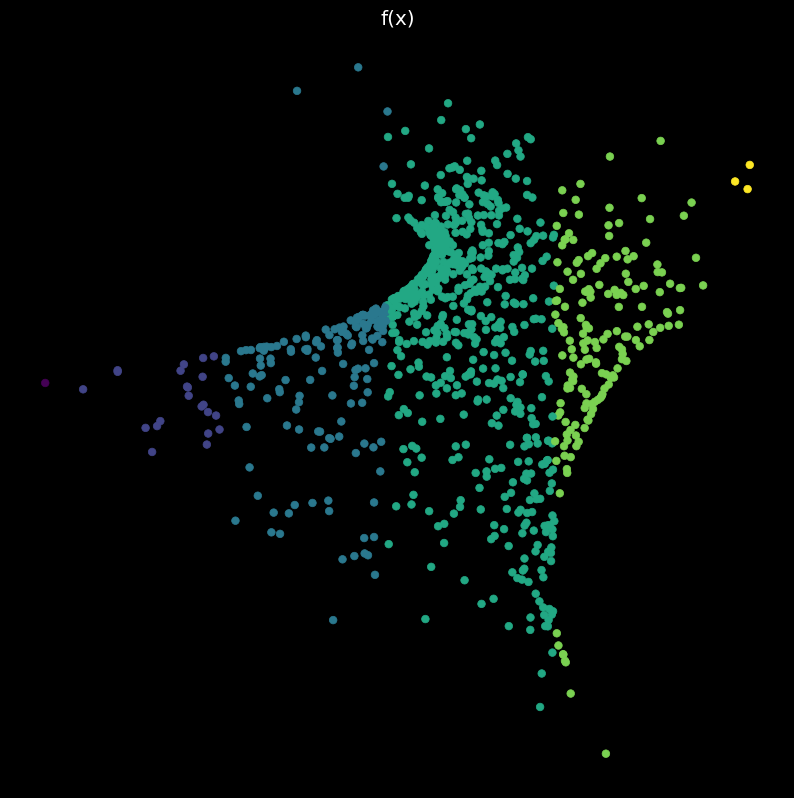

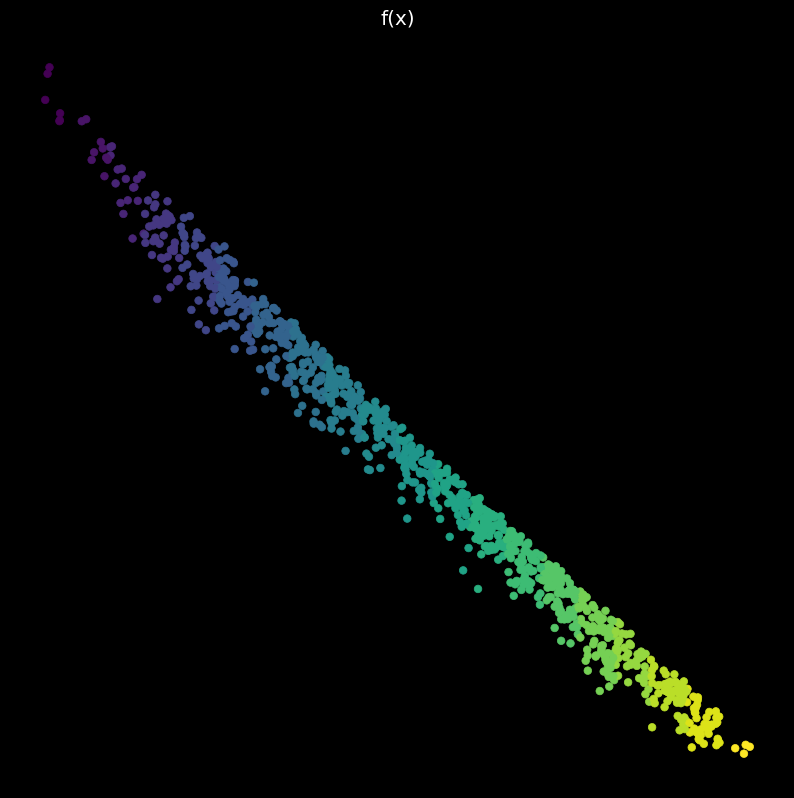

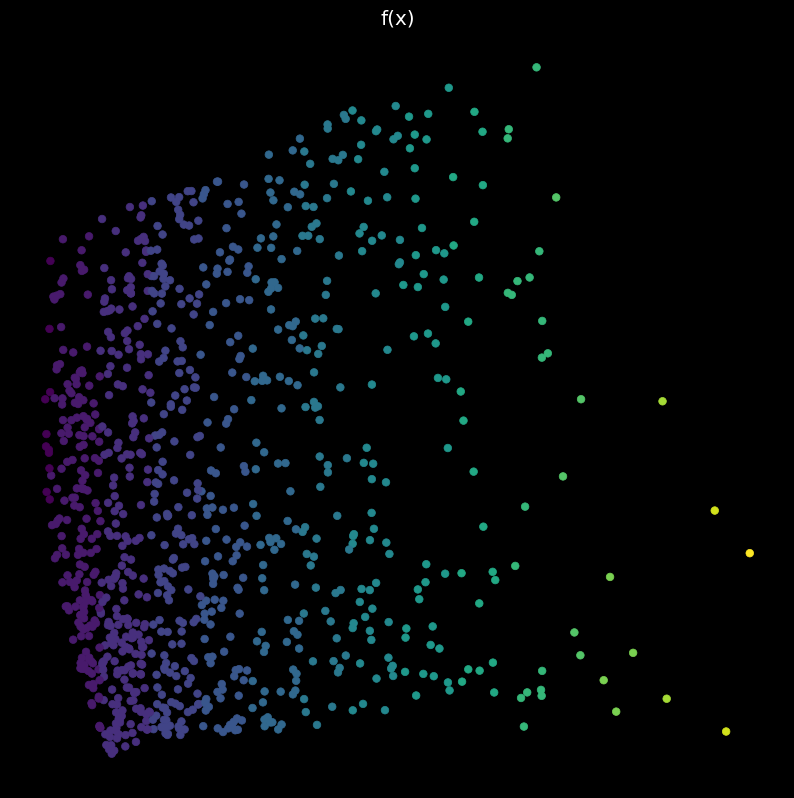

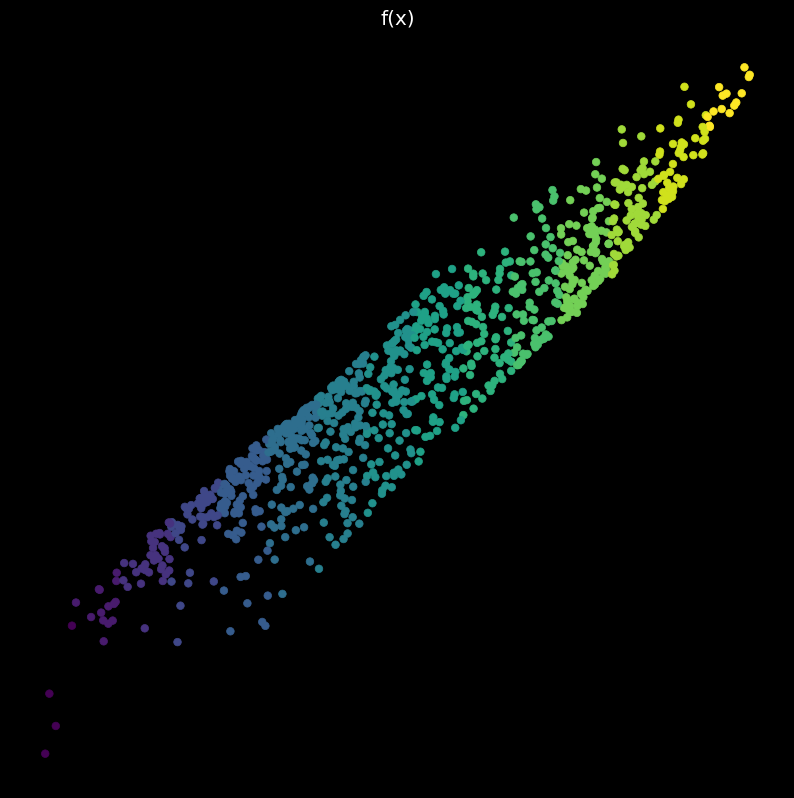

In [18]:
show_scatterplot(X, title='x')
n_hidden = 5

# NL = nn.ReLU()
NL = nn.Tanh()

for i in range(5):
    model = nn.Sequential(
        nn.Linear(2, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, n_hidden), 
        NL, 
        nn.Linear(n_hidden, 2)
    )
    model.to(device)
    with torch.no_grad():
        Y = model(X).detach()
    show_scatterplot(Y, title='f(x)')